# Table of Contents

* [Grover's Algorithm Preview](#Grover's-Algorithm-Preview)
  * [Grover's Algorithm: The Basic](#Basic)
  * [What you need to know](#What-you-need-to-know)
  * [Install Qiskit & Check Versions](#Install-Check)
* [Start](#start)
  * [Running Grover's algorithm](#Running-Grover's-algorithm)
    * [Using the different types of classes as the oracle of Grover](#different-types-of-classes)
  * [Amplitude amplification](#Amplitude-amplification)
    * [State preparation](#State-preparation)
    * [Full flexibility](#Full-flexibility)
  * [Dive into other arguments of Grover](#Arguments-of-`Grover`)
    * [Specifying good_state](#Specifying-gs)
    * [ The number of iterations](#N-interations)
    * [Applying post_processing](#post_processing)
* [Classical Problem Using Quantum Implement](#Classical-Problem-Implementation)
  * [Back to Screening test](#screening-test)
  * [The Implementation](#Implementation)
* [Congratulations](#congrats)

<div class="alert alert-block alert-warning">

This notebook was created for internal training purposes within the **QuantumAI.Cloud (QAC) Hub**, using materials referenced in the Reference section.

</div>

# Grover's Algorithm Preview <a name="Grover's-Algorithm-Preview"></a>

Grover's algorithm is one of the most famous quantum algorithms introduced by Lov Grover in 1996 \[1\]. It has initially been proposed for unstructured search problems, i.e. for finding a marked element in a unstructured database. 

However, Grover's algorithm is now a subroutine to several other algorithms, such as Grover Adaptive Search \[2\]. For the details of Grover's algorithm, please see [Grover's Algorithm](https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/grover.ipynb) in the Qiskit textbook.

When you work with Qiskit, they're already implements the Grover's algorithm in the `Grover` class in their library. This class also includes the **generalized version** which is what we will try to understand and implement in a few next subcodes.

For more advanced Grover's version that `Grover` class also includes, **Amplitude Amplification** \[3\], allows setting individual iterations and other meta-settings to Grover's algorithm.

**References:**

\[1\]: L. K. Grover, A fast quantum mechanical algorithm for database search. Proceedings 28th Annual Symposium on
the Theory of Computing (STOC) 1996, pp. 212-219. https://arxiv.org/abs/quant-ph/9605043

\[2\]: A. Gilliam, S. Woerner, C. Gonciulea, Grover Adaptive Search for Constrained Polynomial Binary Optimization.
https://arxiv.org/abs/1912.04088


\[3\]: Brassard, G., Hoyer, P., Mosca, M., & Tapp, A. (2000). Quantum Amplitude Amplification and Estimation. http://arxiv.org/abs/quant-ph/0005055

## Grover's Algorithm: The Basic <a name="Basic"></a>

Grover's algorithm uses the Grover operator $\mathcal{Q}$ to amplify the amplitudes of the good states:

$$
    \mathcal{Q} = \mathcal{A}\mathcal{S_0}\mathcal{A}^\dagger \mathcal{S_f}
$$

Here,
* $\mathcal{A}$ is the initial search state for the algorithm, which is just Hadamards, $H^{\otimes n}$ for the textbook Grover search, but can be more elaborate for Amplitude Amplification
* $\mathcal{S_0}$ is the reflection about the all 0 state
$$
    |x\rangle \mapsto \begin{cases} -|x\rangle, &x \neq 0 \\ |x\rangle, &x = 0\end{cases}
$$
* $\mathcal{S_f}$ is the oracle that applies
$$
    |x\rangle \mapsto (-1)^{f(x)}|x\rangle
$$
&nbsp;&nbsp;&nbsp;&nbsp;　where $f(x)$ is 1 if $x$ is a good state and otherwise 0.

In a nutshell, Grover's algorithm applies different powers of $\mathcal{Q}$ and after each execution checks whether a good solution has been found.

## What you need to know <a name="What-you-need-to-know"></a>

In this mini project, I'll teaching you how to use the `grover` class which including **Generalized** and **Amplitude Amplification** version. To start with, you will need to know a little bit about the Python programming language. This jupyter file contains a mixture of tutorial content, pre-written code blocks, and **challenge code blocks** that require you to fill in your own `code`. To complete an exercise (or **challenge code blocks**), you'll need to type the required code inbetween each line that has the `## Write your code below here ##` and `## Write your code above here ##`.

### Example of a CHALLENGE CODE BLOCKS

From a given a list of numbers, help me create 2 other lists based from that list, "a" containing odd numbers and "b" containing even numbers. 

In [1]:
# given list of numbers
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# create lists to store even and odd numbers
a = []  # odd
b = []  # even

# iterate over the list and check if the number is even or odd
for number in numbers:
    ## Write your code below here ##
        
    # it should be a if statement with condtion that True when 'number' is divided by 2 and no remainder.
        
    ## Write your code above here ## 
    if number %2 == 0:   
        b.append(number)  # add even number to list b
    else:
        a.append(number)  # add odd number to list a

# print the lists
print("Odd numbers:", a)
print("Even numbers:", b)


Odd numbers: [1, 3, 5, 7, 9]
Even numbers: [2, 4, 6, 8]


Your result should look like this:

`Odd numbers: [1, 3, 5, 7, 9]`

`Even numbers: [2, 4, 6, 8]`

It's important to note that you should **run each code cell**, even if you didn't write any new code there. This ensures that when you submit your answers later on, everything is up to date. There will be one or two exceptions to this rule, depending on what type of computer you are using.

## Install Qiskit & Check Versions <a name="Install-Check"></a>

If you are already have these requirements, please skip these under code blocks:
* Python 3.10 - 3.11
* qiskit 1.0.2 +
* qiskit_algorithms 0.3.0

**Remember, if you need to reinstall any packages, restart your kernel (or runtime) first.**

In [2]:
### CHECK PYTHON VERSION 
import sys
print(sys.version)

3.9.4 (tags/v3.9.4:1f2e308, Apr  6 2021, 13:40:21) [MSC v.1928 64 bit (AMD64)]


In [3]:
### INSTALL QISKIT: Change %pip into !pip if you are using Cloud-based environment (Google Colab)###
%pip install qiskit[visualization]==1.1.0
#  !pip install qiskit[visualization]==1.1.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
### Install the other required packages as well

%pip install qiskit_aer
%pip install qiskit_ibm_runtime
%pip install matplotlib
%pip install pylatexenc
%pip install qiskit-transpiler-service
%pip install qiskit_algorithms
%pip install tweedledum

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
### CHECK QISKIT VERSION
import qiskit
qiskit.__version__

'1.1.0'

In [6]:
import qiskit_algorithms
qiskit_algorithms.__version__

'0.3.0'

In [7]:
### CHECK OTHER DEPENDENCIES
%pip show pylatexenc matplotlib

Name: pylatexencNote: you may need to restart the kernel to use updated packages.

Version: 2.10
Summary: Simple LaTeX parser providing latex-to-unicode and unicode-to-latex conversion
Home-page: https://github.com/phfaist/pylatexenc
Author: Philippe Faist
Author-email: philippe.faist@bluewin.ch
License: MIT
Location: c:\users\hp\music\qintern\week1lab\quantum-algorithms\.venv\lib\site-packages
Requires: 
Required-by: 
---
Name: matplotlib
Version: 3.9.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: Unknown <matplotlib-users@python.org>
License: License agreement for matplotlib versions 1.3.0 and later
        
        1. This LICENSE AGREEMENT is between the Matplotlib Development Team
        ("MDT"), and the Individual or Organization ("Licensee") accessing and
        otherwise using matplotlib software in source or binary form and its
        associated documentation.
        
        2. Subject to the t

And you are ready for the next step ^^

# Start <a name="start"></a>

## Running Grover's algorithm <a name="Running-Grover's-algorithm"></a>

To run Grover's algorithm with the `Grover` class, firstly, we need to specify an oracle for the circuit of Grover's algorithm.

Then we set what is our database have, and where is the `good_state` needed to find in the database

The database is comprised of all the possible computational basis states our qubits can be in. Example: 2 qubits → $|00\rangle, |01\rangle, |10\rangle, |11\rangle$  or $|0\rangle \rightarrow |3\rangle$

Note that the oracle for `Grover` must be a _phase-flip_ oracle. That is, it multiplies the amplitudes of the "good states" by a factor of $-1$. Or in other word, Grover’s algorithm solves oracles that add a negative phase to the solution states, i.e., for any state $|x\rangle$ in the computational basis:

$U_\omega|x\rangle = \bigg\{
\begin{aligned}
\phantom{-}|x\rangle \quad \text{if} \; x \neq \omega \\
-|x\rangle \quad \text{if} \; x = \omega \\
\end{aligned}$

This oracle will be a diagonal matrix, where the entry that corresponds to the marked item will have a negative phase. For example, if we have two qubits and $w=11$, our oracle will have the matrix:
$U_\omega = 
\begin{bmatrix}
1 & 0 & 0 & 0  \\
0 & 1 & 0 & 0  \\
0 & 0 & 1 & 0  \\
0 & 0 & 0 & -1  \\
\end{bmatrix}
\begin{aligned}
\\
\\
\\
\\
\\
\\
\leftarrow \omega = \text{11}\\
\\ \\ \\
\end{aligned}$

There are several other class that we can use as the oracle of Grover's algorithm, but in the following example, we use `QuantumCircuit` as the oracle of Grover's algorithm. We will talk about other oracle's class later in this tutorial. So we convert the above matrix to an oracle of this form following by the below code.

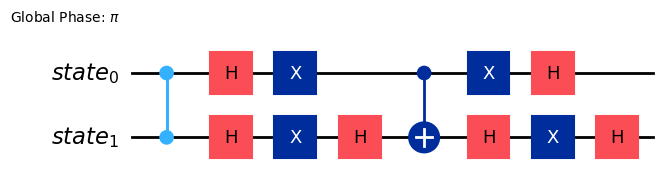

In [8]:
from qiskit import QuantumCircuit
from qiskit_algorithms import AmplificationProblem

# the state we desire to find is '11'
good_state = ['11']

# specify the oracle that marks the state '11' as a good solution
oracle = QuantumCircuit(2)
oracle.cz(0, 1)

# define Grover's algorithm
problem = AmplificationProblem(oracle, is_good_state=good_state)

# now we can have a look at the Grover operator that is used in running the algorithm
# (Algorithm circuits are wrapped in a gate to appear in composition as a block
# so we have to decompose() the op to see it expanded into its component gates.)
problem.grover_operator.decompose().draw(output='mpl')

1. First, we begin by creating a superposition of all $2^n$ computational basis states by applying a Hadamard ($H$) gate on each qubit starting off in the state $|0\rangle^{\otimes n}$

    Here, the exponent $\otimes n$ means that we have a tensor product of the states of $n$ qubits.

![grover_step1.jpg](images/grover_step1.jpg)

2. Second, we apply an Oracle operator to mark the appropriate elements among the $2^n$ elements. The oracle operator applies a coefficient of $-1$ to each of the "good_state" elements (in this case, there only 1 good)state.

![grover_step2.jpg](images/grover_step2.jpg)

3. Third, we apply a Diffusion operator, or diffuser, which inverts the amplitude of all elements about the average amplitude (amplitude amplification)

![grover_step3.jpg](images/grover_step3.jpg)


Then, we specify a backend and call the `run` method of `Grover` with a backend to execute the circuits. The returned result type is a `GroverResult`. 

If the search was successful, the `oracle_evaluation` attribute of the result will be `True`. In this case, the most sampled measurement, `top_measurement`, is one of the "good states". Otherwise, `oracle_evaluation` will be False.

In [9]:
from qiskit_algorithms import Grover
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

grover = Grover(sampler=Sampler())
result = grover.amplify(problem)
print('Result type:', type(result))
print(result)
print()
print('Success!' if result.oracle_evaluation else 'Failure!')
print('Top measurement:', result.top_measurement)



Result type: <class 'qiskit_algorithms.amplitude_amplifiers.grover.GroverResult'>
{   'assignment': '11',
    'circuit_results': [{'11': 0.9999999999999986}],
    'iterations': [1],
    'max_probability': 0.9999999999999986,
    'oracle_evaluation': True,
    'top_measurement': '11'}

Success!
Top measurement: 11


In the example, the result of `top_measurement` is `11` which is one of "good state". Thus, we succeeded to find the answer by using `Grover`.

### Using the different types of classes as the oracle of Grover (Bonus) <a name="different-types-of-classes"></a>
In the above example, we used `QuantumCircuit` as the oracle of `Grover`. 
However, we can also use `qiskit.quantum_info.Statevector` as oracle.
All the following examples are when $|11\rangle$ is "good state"

In [10]:
from qiskit.quantum_info import Statevector
oracle = Statevector.from_label('11')
problem = AmplificationProblem(oracle, is_good_state=['11'])

grover = Grover(sampler=Sampler())
result = grover.amplify(problem)
print('Result type:', type(result))
print()
print('Success!' if result.oracle_evaluation else 'Failure!')
print('Top measurement:', result.top_measurement)

Result type: <class 'qiskit_algorithms.amplitude_amplifiers.grover.GroverResult'>

Success!
Top measurement: 11


Internally, the statevector is mapped to a quantum circuit:

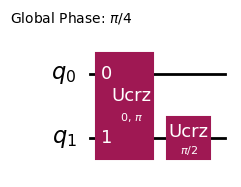

In [11]:
problem.grover_operator.oracle.decompose().draw(output='mpl')

Qiskit allows for an easy construction of more complex oracles:
* `PhaseOracle`: for parsing logical expressions such as `'~a | b'`. This is especially useful for solving 3-SAT problems and is shown in the accompanying [Grover Examples](07_grover_examples.ipynb) tutorial.

Here we'll use the `PhaseOracle` for the simple example of finding the state $|11\rangle$, which corresponds to `'a & b'`.

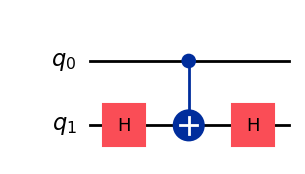

In [12]:
from qiskit.circuit.library.phase_oracle import PhaseOracle
from qiskit.exceptions import MissingOptionalLibraryError

# `Oracle` (`PhaseOracle`) as the `oracle` argument
expression = '(a & b)'
try:
    oracle = PhaseOracle(expression)
    problem = AmplificationProblem(oracle)
    display(problem.grover_operator.oracle.decompose().draw(output='mpl'))
except MissingOptionalLibraryError as ex:
    print(ex)

Which we observe that this oracle implements a phase flip when the state is  $|11\rangle$

As mentioned above, Grover's algorithm requires a _phase-flip_ oracle. A bit-flip oracle flips the state of an auxiliary qubit if the other qubits satisfy the condition. To use these types of oracles with Grover's we need to convert the bit-flip oracle to a phase-flip oracle by sandwiching the auxiliary qubit of the bit-flip oracle by $X$ and $H$ gates.

**Note:** This transformation from a bit-flip to a phase-flip oracle holds generally and you can use this to convert your oracle to the right representation.

## Amplitude amplification <a name="Amplitude-amplification"></a>
Grover's algorithm uses Hadamard gates to create the uniform superposition of all the states at the beginning of the Grover operator $\mathcal{Q}$. If some information on the good states is available, it might be useful to not start in a uniform superposition but only initialize specific states. This, generalized, version of Grover's algorithm is referred to _Amplitude Amplification_.

In Qiskit, the initial superposition state can easily be adjusted by setting the `state_preparation` argument.

### State preparation <a name="State-preparation"></a>

A `state_preparation` argument is used to specify a quantum circuit that prepares a quantum state for the start point of the amplitude amplification.
By default, a circuit with $H^{\otimes n}$ is used to prepare uniform superposition (so it will be Grover's search). The diffusion circuit of the amplitude amplification reflects `state_preparation` automatically.

state preparation circuit:


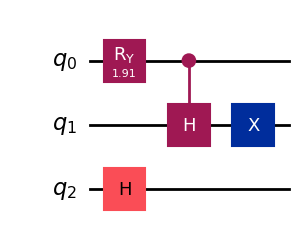

In [13]:
import numpy as np

# Specifying `state_preparation` 
# to prepare a superposition of |01>, |10>, and |11>
oracle = QuantumCircuit(3)
oracle.ccz(0, 1, 2)

theta = 2 * np.arccos(1 / np.sqrt(3))

state_preparation = QuantumCircuit(3)
state_preparation.ry(theta, 0)
state_preparation.ch(0,1)
state_preparation.x(1)
state_preparation.h(2)

# we only care about the first two bits being in state 1, thus add both possibilities for the last qubit
problem = AmplificationProblem(oracle, state_preparation=state_preparation, is_good_state=['110', '111'])

# state_preparation
print('state preparation circuit:')
problem.grover_operator.state_preparation.draw(output='mpl')

In [14]:
grover = Grover(sampler=Sampler())
result = grover.amplify(problem)
print('Success!' if result.oracle_evaluation else 'Failure!')
print('Top measurement:', result.top_measurement)

Success!
Top measurement: 111


### Full flexibility <a name="Full-flexibility"></a>

For more advanced use, it is also possible to specify the entire Grover operator by setting the `grover_operator` argument. This might be useful if you know more efficient implementation for $\mathcal{Q}$ than the default construction via zero reflection, oracle and state preparation.

The `qiskit.circuit.library.GroverOperator` can be a good starting point and offers more options for an automated construction of the Grover operator. You can for instance 
* set the `mcx_mode` 
* ignore qubits in the zero reflection by setting `reflection_qubits`
* explicitly exchange the $\mathcal{S_f}, \mathcal{S_0}$ and $\mathcal{A}$ operations using the `oracle`, `zero_reflection` and `state_preparation` arguments

For instance, imagine the good state is a three qubit state $|111\rangle$ but we used 2 additional qubits as auxiliary qubits. 

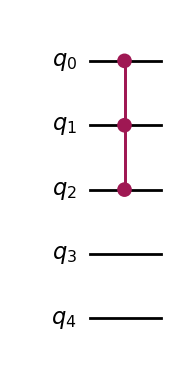

In [15]:
oracle = QuantumCircuit(5)
oracle.ccz(0, 1, 2)
oracle.draw(output='mpl')

Then, per default, the Grover operator implements the zero reflection on all five qubits.

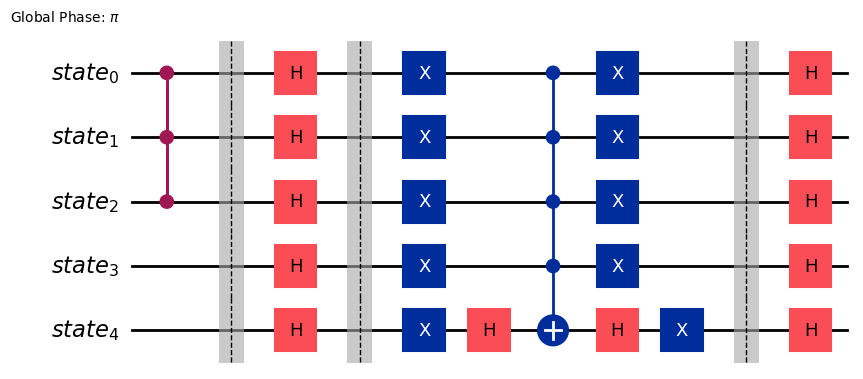

In [16]:
from qiskit.circuit.library import GroverOperator
grover_op = GroverOperator(oracle, insert_barriers=True)
grover_op.decompose().draw(output='mpl')

But we know that we only need to consider the first three:

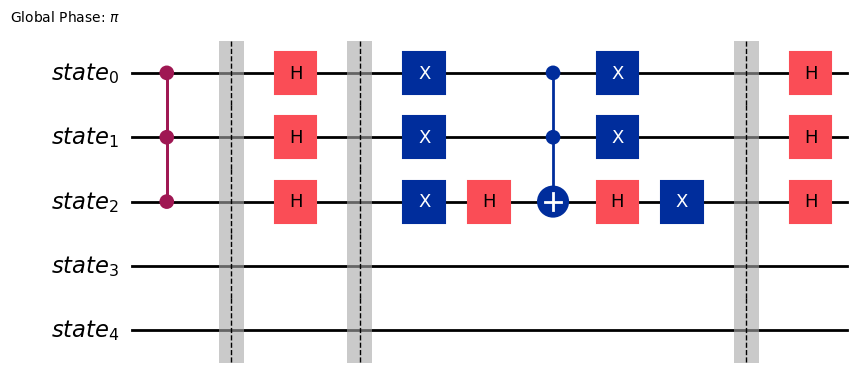

In [17]:
grover_op = GroverOperator(oracle, reflection_qubits=[0, 1, 2], insert_barriers=True)
grover_op.decompose().draw(output='mpl')

## Dive into other arguments of `Grover` <a name="Arguments-of-`Grover"></a>
`Grover` has arguments other than `oracle` and `state_preparation`. We will explain them in this section.



### Specifying `good_state` <a name="Specifying-gs"></a>
`good_state` is used to check whether the measurement result is correct or not internally. It can be a list of binary strings, a list of integer, `Statevector`, and Callable. If the input is a list of bitstrings, each bitstrings in the list represents a good state. If the input is a list of integer, each integer represent the index of the good state to be $|1\rangle$.


In [18]:
# a list of binary strings good state
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
good_state = ['11', '00']
problem = AmplificationProblem(oracle, is_good_state=good_state)
print(problem.is_good_state('11'))

True


In [19]:
# a list of integer good state
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
good_state = [0, 1]
problem = AmplificationProblem(oracle, is_good_state=good_state)
print(problem.is_good_state('11'))

True


 If it is a `Statevector`, it represents a superposition of all good states.

In [20]:
from qiskit.quantum_info import Statevector

# `Statevector` good state
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
good_state = Statevector.from_label('11')
problem = AmplificationProblem(oracle, is_good_state=good_state)
print(problem.is_good_state('11'))

True


In [21]:
# Callable good state
def callable_good_state(bitstr):
    if bitstr == "11":
        return True
    return False

oracle = QuantumCircuit(2)
oracle.cz(0, 1)
problem = AmplificationProblem(oracle, is_good_state=good_state)
print(problem.is_good_state('11'))

True


### The number of `iterations` <a name="N-interations"></a>

The number of repetition of applying the Grover operator is important to obtain the correct result with Grover's algorithm. The number of iteration can be set by the `iteration` argument of `Grover`. The following inputs are supported:
* an integer to specify a single power of the Grover operator that's applied
* or a list of integers, in which all these different powers of the Grover operator are run consecutively and after each time we check if a correct solution has been found

Additionally there is the `sample_from_iterations` argument. When it is `True`, instead of the specific power in `iterations`, a random integer between 0 and the value in `iteration` is used as the power Grover's operator. This approach is useful when we don't even know the number of solution.

For more details of the algorithm using `sample_from_iterations`, see [4].

**References:**

[4]: Boyer et al., Tight bounds on quantum searching [arxiv:quant-ph/9605034](https://arxiv.org/abs/quant-ph/9605034)

In [22]:
# integer iteration
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
problem = AmplificationProblem(oracle, is_good_state=['11'])
grover = Grover(iterations=1)

In [23]:
# list iteration
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
problem = AmplificationProblem(oracle, is_good_state=['11'])
grover = Grover(iterations=[1, 2, 3])

In [24]:
# using sample_from_iterations
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
problem = AmplificationProblem(oracle, is_good_state=['11'])
grover = Grover(iterations=[1, 2, 3], sample_from_iterations=True)

When the number of solutions is known, we can also use a static method `optimal_num_iterations` to find the optimal number of iterations. Note that the output iterations is an approximate value. When the number of qubits is small, the output iterations may not be optimal. In addition, the calculation of this value assumes the standard uniform superposition state preparation and may not be accurate for other state preparations.


In [25]:
iterations = Grover.optimal_num_iterations(num_solutions=1, num_qubits=8)
iterations

12

### Applying `post_processing`
We can apply an optional post processing to the top measurement for ease of readability. It can be used e.g. to convert from the bit-representation of the measurement `[1, 0, 1]` to a DIMACS CNF format `[1, -2, 3]`.

In [26]:
def to_DIAMACS_CNF_format(bit_rep):
    return [index+1 if val==1 else -1 * (index + 1) for index, val in enumerate(bit_rep)]

oracle = QuantumCircuit(2)
oracle.cz(0, 1)
problem = AmplificationProblem(oracle, is_good_state=['11'], post_processing=to_DIAMACS_CNF_format)
problem.post_processing([1, 0, 1])

[1, -2, 3]

# Classical Problem Using Quantum Implement <a name="Classical_Implementation"></a>

## Back to Screening Test <a name="screening-test"></a>
Some of you might not familiar to the screening test that made by Hoa Nguyen, so the Screening test basically:

Develop a Python program to generate a list of $2n$ unique random positive integers, each using a maximum of $n$ bits and represented in decimals, and another random positive integer, $k$ , using $n$ bits.  Then, choose one (or more, if you prefer) of the following options to implement:

**Please display the results and the number of steps required to achieve them.**

💡Check if $k$ exists in the list.

💡Find all integers less than $k$ in the list.

💡What problems in 1-2 that we can implement a Quantum Solution into, explaining why and write out the code implementation ?

Lets just skip " generating a list of $2n$ and $k$ " by using these under given list, K number and jump right into the 💡 problems. Given n = 5 then generate a random numbers list and k value that in the range of (0 -> 31)

In [27]:
n = 5
k, list_n = 8, [18, 26, 24, 4, 11, 2, 29, 9, 6, 16]


Yes, I guessed you would come up with using Binary Search (BS) Algorithm to check out both "`check k existance`" and "`find numbers < k`". But BS need a sorted list of number to even start with, so help me create a sort out (in ascending order) `sorted_list_n` using the `list_n` above

In [28]:
## Write your code below here ##
sorted_list_n = list_n
sorted_list_n.sort()


## Write your code above here ## 
print(sorted_list_n)

[2, 4, 6, 9, 11, 16, 18, 24, 26, 29]


There also the code that "check k existance" by using BS algorithm and "list the numbers < k" by just slice `list input` up to the number's `position`

In [29]:
def check_k_BinarySearch(k: int, array: list[int], low= 0, steps= 0):
  # Repeat until the pointers low and high meet each other
  high = len(array)-1
  while low <= high:
      steps += 1 # Count step for each iteration
      mid = low + (high - low)//2
      if array[mid] == k:
          return True, steps, mid # K found
      elif array[mid] < k:
          low = mid + 1
      else:
          high = mid - 1
  return False, steps, mid # K not found

def find_less_than_k(position: int, list_input: list[int], steps=1):
  new_list = list_input[:position]
  return new_list, steps

In [30]:
# example usage

k_exist, ste, position = check_k_BinarySearch(k, sorted_list_n)
print((k_exist, position), ste)

list_nk = find_less_than_k(position, sorted_list_n)
print(list_nk)

(False, 3) 4
([2, 4, 6], 1)


The solution should come like this,

`(False, 3) 4`

`([2, 4, 6], 1)`

where `(False, 3) 4` is K is **Not Exist** in the list, its take 4 step to see K > position 3, that list(3) < K < list(4)

where `([2, 4, 6], 1)` is `[2, 4, 6]` is list containing the numbers that smaller than K and its take only 1 step to perfrom the function 

## The Implementation <a name="Implementation"></a>

So now moving on to implement the quantum grover's searching algorithm. we will going on step by step and hopefully we can get the result that similar to the upper classical solution. Starting with the Conversion of our numbers, since Quantum circuit and qubits only read Binary input, so please help me convert `k` and ` list_n` into `k_Q` and `list_n_bit`

In [31]:
import qiskit
import qiskit_algorithms

# Binary strings converting
## Write your code below here ##
k_Q = bin(k)[2:].zfill(5)
list_n_bit = []
for i in range(len(list_n)): 
    list_n_bit.append( str(bin(list_n[i])[2:].zfill(5)))


## Write your code above here ##  

print('list_n_bit =', list_n_bit)
print('k_Q =', k_Q)

list_n_bit = ['00010', '00100', '00110', '01001', '01011', '10000', '10010', '11000', '11010', '11101']
k_Q = 01000


your solution should look like this 

`list_n_bit = ['10010', '11010', '11000', '00100', '01011', '00010', '11101', '01001', '00110', '10000']`

`k_Q = 01000`

Coming to the main part of Quantum Implementation, you need to help me fill in your own code, mostly aim on how well do you understand the **Amplitude amplification** part, such as how would you set a `good_state` in this case, how can you `draw a Quantum circuit`, and how would you select the `number of iterations`. Good luck

state preparation circuit:


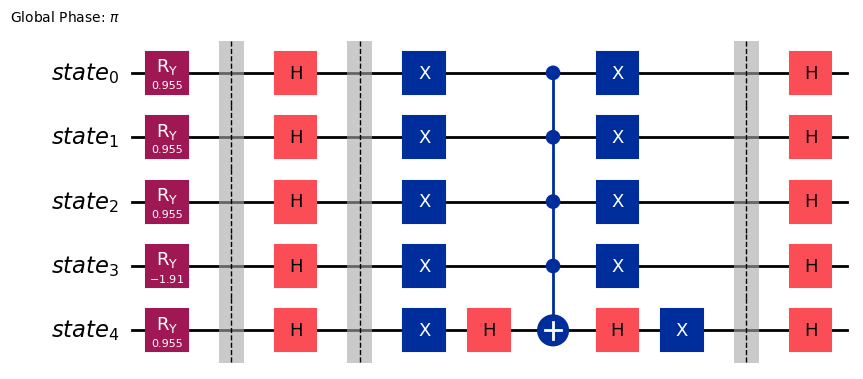

In [174]:
from qiskit import QuantumCircuit
from qiskit_algorithms import AmplificationProblem
from qiskit_algorithms import Grover
from qiskit.primitives import Sampler
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import MCMT

# Initial a n qubits circuit based on our k_Q bits value
# These 5 qubits containing 2^5 state, the state we desire to find is 'k_Q = 01000 (decimal is 8)'
# Mark the k_Q state for a higher amplitude than other, using Statevector or QuantumCircuit by your choice

## Write your code below here ##

#oracle = Statevector.from_label('01000')
#state = Statevector.from_label('01000')
oracle = QuantumCircuit(5)
#oracle.prepare_state(state)
theta =  np.arccos(1 / np.sqrt(3))
for i,bit in enumerate(k_Q[::-1]):
    
    if bit == '1':
        oracle.ry(-2*theta, i)
    else:
        oracle.ry(theta, i)
        
    

## Write your code above here ##  

# define Grover's algorithm
# Mark the state of each value in the list, giving it a little bit higher amplitude than all other state
#theta =  np.arccos(1 / np.sqrt(3))
#oracle.ry(2*theta, 3)

grover_op = GroverOperator(oracle, insert_barriers=True)
problem = AmplificationProblem(grover_op, is_good_state=list_n_bit)
# draw the circuit by decompose() the grover operator ( hint: problem class) to see it expanded into its component gates.

## Write your code below here ##

print('state preparation circuit:')
grover_op.decompose().draw(output='mpl')
## Write your code above here ##  



Your output should look somewhat similer to this image:

![grover_outputPrac.png](images/grover_outputPrac.png)

In [175]:
# Setting the right number of Interations or method to call Interation then run the Grover Diffusion to get the result
## Write your code below here ##
iterations = Grover.optimal_num_iterations(num_solutions=1, num_qubits=5)
grover = Grover(sampler=Sampler(),iterations=5)

## Write your code above here ##  
result = grover.amplify(problem)

In [176]:
print("Result type:", type(result))
print()
print("Top measurement:", result.top_measurement)
print("Oracle evaluation:", result.oracle_evaluation)
print(f"{result.top_measurement} or k value ( indecimal {k}) does exist in the list" if result.oracle_evaluation else f"{result.top_measurement} or k value ({k}) does not exist in the list")
print(f"of {list_n}")


Result type: <class 'qiskit_algorithms.amplitude_amplifiers.grover.GroverResult'>

Top measurement: 01000
Oracle evaluation: False
01000 or k value (8) does not exist in the list
of [2, 4, 6, 9, 11, 16, 18, 24, 26, 29]


If you done all correctly, the code should ouput like this:

    Result type: <class 'qiskit_algorithms.amplitude_amplifiers.grover.GroverResult'>

    Top measurement: 01000

    Oracle evaluation: False

    01000 or k value (8) does not exist in the list

    of [18, 26, 24, 4, 11, 2, 29, 9, 6, 16]

We can get the dictionary `result.circuit_results` that show all the probability of the bits in our 5 given qubits.

In [177]:
dic =  result.circuit_results [0]
dic

{'00000': 0.4341888600094168,
 '00001': 0.0004476178571872,
 '00010': 0.0004476178571872,
 '00011': 4.614621989e-07,
 '00100': 0.0004476178571872,
 '00101': 4.614621989e-07,
 '00110': 4.614621989e-07,
 '00111': 4.757347e-10,
 '01000': 0.5616980305379634,
 '01001': 0.0005790707500193,
 '01010': 0.0005790707500193,
 '01011': 5.969807891e-07,
 '01100': 0.0005790707500193,
 '01101': 5.969807891e-07,
 '01110': 5.969807891e-07,
 '01111': 6.154448e-10,
 '10000': 0.0004476178571872,
 '10001': 4.614621989e-07,
 '10010': 4.614621989e-07,
 '10011': 4.757347e-10,
 '10100': 4.614621989e-07,
 '10101': 4.757347e-10,
 '10110': 4.757347e-10,
 '10111': 4.904e-13,
 '11000': 0.0005790707500193,
 '11001': 5.969807891e-07,
 '11010': 5.969807891e-07,
 '11011': 6.154448e-10,
 '11100': 5.969807891e-07,
 '11101': 6.154448e-10,
 '11110': 6.154448e-10,
 '11111': 6.345e-13}

To see how is the result on the range of [0 - 31] or [00000 - 11111], Help me finishing up the code of Histogram graph ploting by using the dictionary `result.circuit_results` as `dic`

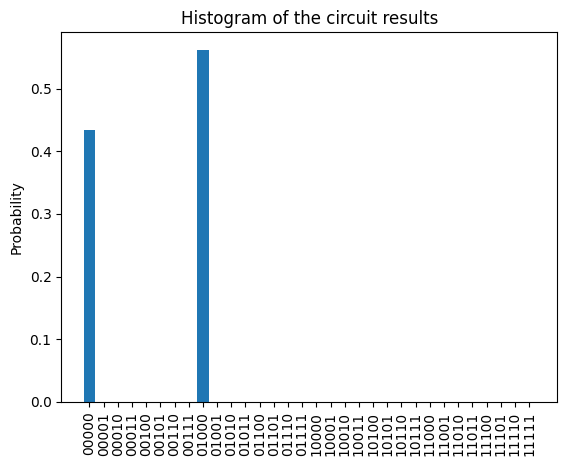

In [178]:
import matplotlib.pyplot as plt

# Extract keys and values from the dictionary into x and y which will turn in x axis and y axis of the graph

## Write your code below here ##

x = list(dic.keys())
y = list(dic.values())

## Write your code above here ##  

# Create a bar chart
plt.bar(x, y)

# Add labels and title

plt.ylabel('Probability')
plt.title('Histogram of the circuit results')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

And your result should be looking somewhat similar to our theory result, but now our $|\omega\rangle = 01000$ or $8$

![grover_step3.jpg](images/grover_step3.jpg)

# Congratulations! <a name="congrats"></a>

Congratulations on making it to the end of lab 2 - Grover's algorithm!

You learned how to follow the workflow of Qiskit patterns to set up and applied the **Grover's algorithm**. You successfully created a `Grover` class of qubits, ultilized them and showed that it was using entangled qubits to find out the exact qubit we need among others. You also learned what is the basic step behind the algorithm and how it work as well. **Rock on!**

With the basics down, you’re now ready to begin thinking like a quantum developer. It’s a little different than thinking like a quantum physicist, though. We’re not just making discoveries about how the world works—we’re trying to use quantum mechanics as a tool to solve meaningful problems and enact positive change in the world.

_"We like to say we’ve entered the era of quantum utility—for the first time, quantum computers can do things beyond the abilities of brute-force classical computing. Now, we’re looking for quantum advantage, where quantum computers are the best way to solve the problem. We need you, the quantum community for that—we need to uncover and implement quantum algorithms and apply them to real-world use cases. The rest of the challenge will be devoted to that—getting you to start thinking like a quantum developer."_

_ _IBM on Quantum Computing Congratulation_ _

You are now ready to move forward with the other labs of [Shor, and Deustch-Jozsa Algorithm Of QAC](https://github.com/QuantumAICloud/quantum-algorithms/). Good luck!